# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#leemos datos
df = pd.read_csv('../data/raw/Crypto Data Since 2015.csv')

df.head()

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.045930,5.987009
1,2015-01-02,1135.844985,110.806193,1201.928708,0.526877,20.271863,0.222041,0.054818,5.687508
2,2015-01-03,1250.613839,116.286699,1201.829678,0.520009,19.974075,0.229863,0.049255,7.050012
3,2015-01-04,1452.916825,118.393314,1199.858272,0.563435,19.942816,0.243224,0.047298,7.903578
4,2015-01-05,1479.501487,128.322865,1200.014190,0.644235,20.201745,0.238137,0.044584,8.140522


In [3]:
df.info()
#aqui vemos cuantos hay en total, cuantas no nulas y el tipo de dato de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


aqui revisamos si todas las columnas son necesarias, aseguramos que no hayan marcadores, etc y ademas transformamos columnas categoricas

aqui convertimos la fecha en numerico

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3858 non-null   datetime64[ns]
 1   Bitcoin (USD)       3858 non-null   float64       
 2   Ethereum (USD)      3858 non-null   float64       
 3   Gold (USD per oz)   3858 non-null   float64       
 4   Cardano (ADA)       3858 non-null   float64       
 5   Binance Coin (BNB)  3858 non-null   float64       
 6   Ripple (XRP)        3858 non-null   float64       
 7   Dogecoin (DOGE)     3858 non-null   float64       
 8   Solana (SOL)        3858 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 271.4 KB


aqui hacemos graficos de columnas numericas en el tiempo

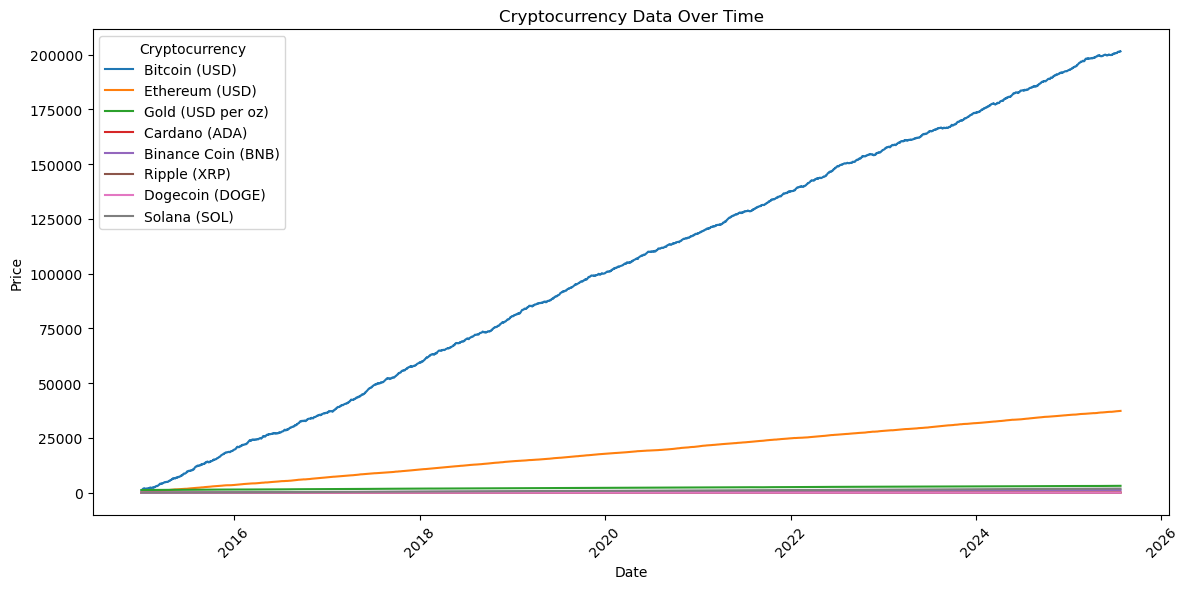

In [6]:
plt.figure(figsize=(12, 6))
for column in df.columns:
    if column not in ['Date', 'Name', 'Symbol']:
        sns.lineplot(data=df, x='Date', y=column, label=column)
plt.title('Cryptocurrency Data Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Cryptocurrency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
max_date = df['Date'].max()
print(f"la fecha maxima en el dataset es: {max_date}")

la fecha maxima en el dataset es: 2025-07-24 00:00:00


In [8]:
from datetime import timedelta
test_start_date = max_date - timedelta(days=180)
train_df = df[df['Date'] < test_start_date]
test_df = df[df['Date'] >= test_start_date]
print(f"train set size: {train_df.shape}")
print(f"test set size: {test_df.shape}")

train set size: (3677, 9)
test set size: (181, 9)


Ahora vamos a escalar las columnas de precios

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_columns = df.columns.difference(['Date'])
train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
test_df[price_columns] = scaler.transform(test_df[price_columns])
train_df.head()

/var/folders/jj/wwsms9kd5gn6q7k42m7mx3jh0000gn/T/ipykernel_8386/1922916142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
/var/folders/jj/wwsms9kd5gn6q7k42m7mx3jh0000gn/T/ipykernel_8386/1922916142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[price_columns] = scaler.transform(test_df[price_columns])


,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000178,0.000169
1,2015-01-02,0.000187,0.000226,0.001551,0.000465,0.000312,0.000350,0.001352,0.000000
2,2015-01-03,0.000781,0.000380,0.001497,0.000378,0.000051,0.000568,0.000617,0.000770
3,2015-01-04,0.001827,0.000440,0.000427,0.000932,0.000024,0.000941,0.000359,0.001253
4,2015-01-05,0.001964,0.000719,0.000512,0.001964,0.000251,0.000799,0.000000,0.001386


AQUI GRAFICAMOS LOS VALORES ESCALADOS

In [10]:
plt.figure(figsize=(12, 6))
for column in scaler:
if columns not in ['Date', 'Name', 'Symbol']:
sns.lineplot(data=df, x='Date', y=column, label=column)
plt.title('Cryptocurrency Data Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Cryptocurrency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 2 (4244281313.py, line 3)

Aqui vemos las correlaciones

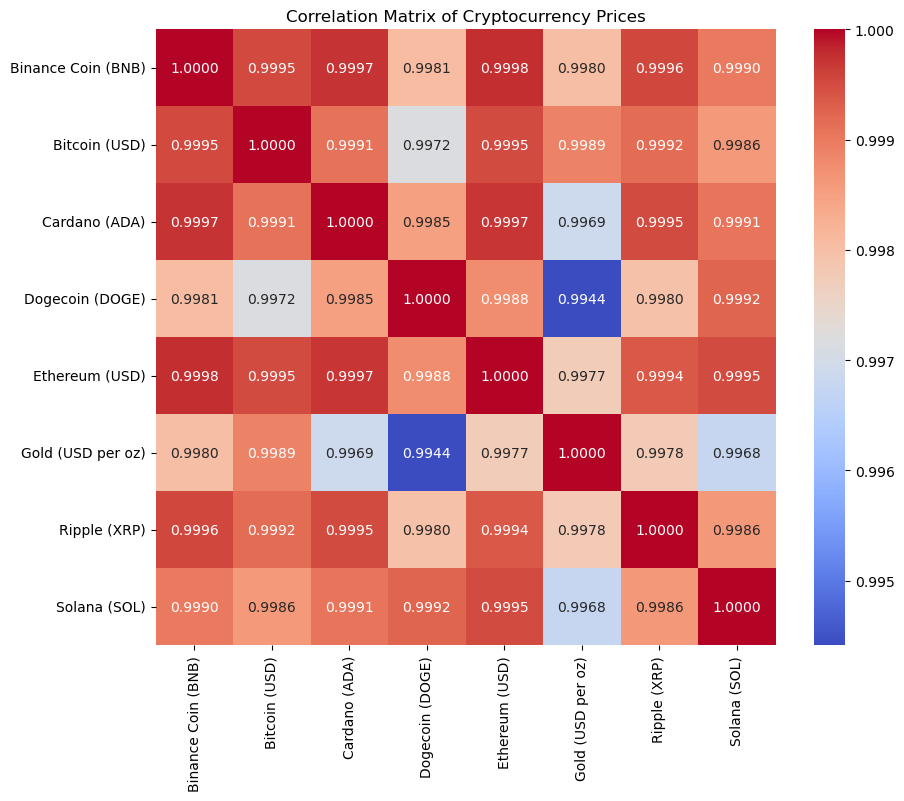

In [ ]:
plt.figure (figsize=(10, 8))
correlation_matrix = train_df[price_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix of Cryptocurrency Prices')
plt.show()

aqui podemos ver que al estar tan correlacionadas, tenemos multicolinealidad

aqui decidimos que nuestra variable a predecir sera el precio de ETH y vamos a buscar usar otros precios desfasados 5 dias como caracteristicas

In [12]:
def create_features(df, target_column, lag=15):
    for i in range(1, lag + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(i)
    return df
train_df = create_features(train_df, 'Ethereum (USD)', lag=15)
test_df = create_features(test_df, 'Ethereum (USD)', lag=15)
#eliminamos filas con valores nNAN
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

/var/folders/jj/wwsms9kd5gn6q7k42m7mx3jh0000gn/T/ipykernel_8386/1194630006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{lag}'] = df[target_column].shift(i)
/var/folders/jj/wwsms9kd5gn6q7k42m7mx3jh0000gn/T/ipykernel_8386/1194630006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{lag}'] = df[target_column].shift(i)
/var/folders/jj/wwsms9kd5gn6q7k42m7mx3jh0000gn/T/ipykernel_8386/1194630006.py:8: SettingWithCopyWarning: 
A value is trying to be set 

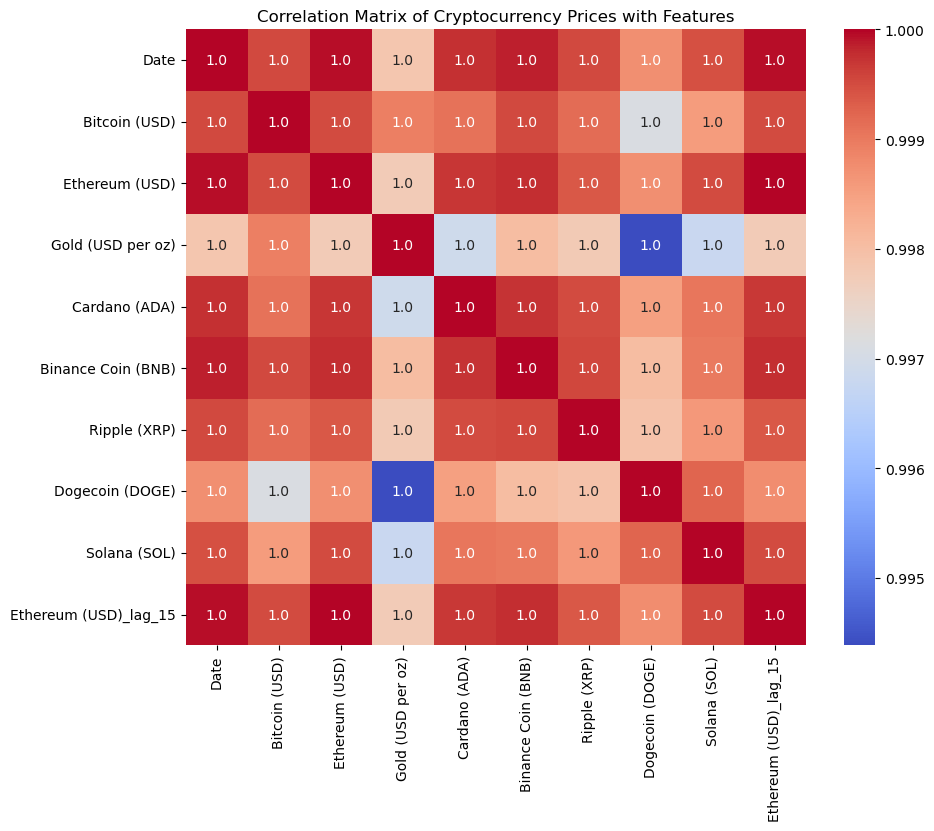

In [13]:
plt.figure(figsize=(10,8))
correlation_matri = train_df.corr()
sns.heatmap(correlation_matri, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of Cryptocurrency Prices with Features')
plt.show()

ahora vamos a usar el lag 15 de ETH para predecir el precio actual de binance

In [ ]:
X_train = train_df[['Date', 'Ethereum (USD)_lag_15']].copy()

Ahora separamos las columnas predictoras y la variable objetivo


In [15]:
X_train = train_df[['Ethereum (USD)_lag_15']]
y_train = train_df['Binance Coin (BNB)']
X_test = test_df[['Ethereum (USD)_lag_15']]
y_test = test_df['Binance Coin (BNB)']
                    


VAMOS A ENTRENAR VARIOS MODELOS DE REGRESION para saber cual es el mejor

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2} 

#MOSTRAT LOS RESULTADOS
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False, inplace=True)
print("Model Performance:")     
 

Model Performance:


cuando tenga altas correlaciones, un modelo de regresion lineal siempre vaa a ser la mejor opcion